## tests on mass/age prior

In [23]:
from jaxstar import mistfit
from jax import random
import arviz, corner
import pandas as pd
import numpy as np

In [24]:
%matplotlib inline

In [25]:
mf = mistfit.MistFit()

In [26]:
# observed Kmag, Teff, Fe/H, parallax (mas)
kmag_obs, kmag_err, teff_obs, feh_obs, parallax_obs, parallax_err\
= [ 8.84300000e+00,  1.40000000e-02,  5.71900000e+03, -1.20000000e-01, 7.27355841e+00,  3.00812913e-02]
teff_err, feh_err = 110, 0.1

In [27]:
mf.set_data(['kmag', 'teff', 'feh', 'parallax'],\
            [kmag_obs, teff_obs, feh_obs, parallax_obs],\
            [kmag_err, teff_err, feh_err, parallax_err])

In [28]:
# setup HMC
ns = 20000
mf.setup_hmc(num_warmup=ns, num_samples=ns)

### flat mass--linear age prior

In [29]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=False, nodata=True)

sample: 100%|██████████| 40000/40000 [00:44<00:00, 897.15it/s, 255 steps of size 5.53e-03. acc. prob=0.96]  



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      5.57      4.01      4.89      0.10     11.67   7202.26      1.00
  distance      4.04      2.30      3.61      0.56      7.28   9460.19      1.00
       eep    333.55     53.34    328.28    243.89    416.11   2634.61      1.00
       feh     -0.21      0.44     -0.18     -0.83      0.50   9142.05      1.00

Number of divergences: 50


In [30]:
samples = mf.samples

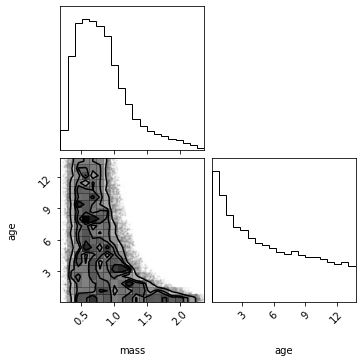

In [31]:
fig = corner.corner(np.array([samples['mass'], samples['age']]).T, labels=['mass', 'age'])

### flat mass--logage prior

In [32]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=False, flat_age_marginal=False, nodata=True)

sample: 100%|██████████| 40000/40000 [00:45<00:00, 874.86it/s, 511 steps of size 7.40e-03. acc. prob=0.93]  



                mean       std    median      5.0%     95.0%     n_eff     r_hat
  distance      4.06      2.30      3.63      0.65      7.34   9371.90      1.00
       eep    303.48     54.77    304.26    196.84    367.72   2651.53      1.00
       feh     -0.23      0.43     -0.22     -0.84      0.50   9241.73      1.00
    logage      8.87      0.56      8.81      8.00      9.71   5325.62      1.00

Number of divergences: 23


In [33]:
samples = mf.samples

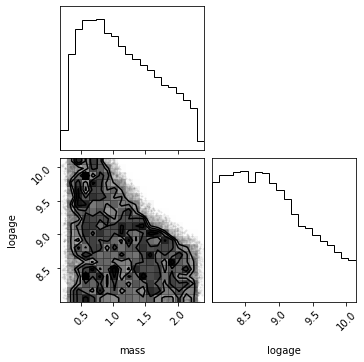

In [35]:
fig = corner.corner(np.array([samples['mass'], samples['logage']]).T, labels=['mass', 'logage'])

### flat marginal logage

In [36]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=False, flat_age_marginal=True, nodata=True)

sample: 100%|██████████| 40000/40000 [01:07<00:00, 592.92it/s, 1023 steps of size 5.43e-03. acc. prob=0.95]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
  distance      4.06      2.35      3.60      0.60      7.44   8824.52      1.00
       eep    312.98     56.37    312.02    215.00    393.34   2418.03      1.00
       feh     -0.26      0.43     -0.26     -1.00      0.34   8182.17      1.00
    logage      9.07      0.61      9.07      8.03      9.93   5077.44      1.00

Number of divergences: 18


In [37]:
samples = mf.samples

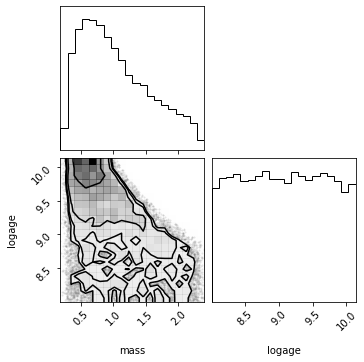

In [38]:
fig = corner.corner(np.array([samples['mass'], samples['logage']]).T, labels=['mass', 'logage'])

### flat marginal age

In [ ]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=True, nodata=True)

sample:  68%|██████▊   | 27142/40000 [00:48<00:21, 608.71it/s, 1023 steps of size 4.40e-03. acc. prob=0.97]

In [ ]:
samples = mf.samples

In [ ]:
fig = corner.corner(np.array([samples['mass'], samples['logage']]).T, labels=['mass', 'logage'])